   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
✅ Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.85      0.91      0.88        45

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80


Confu

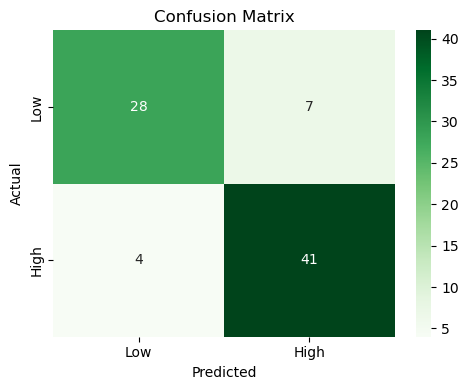

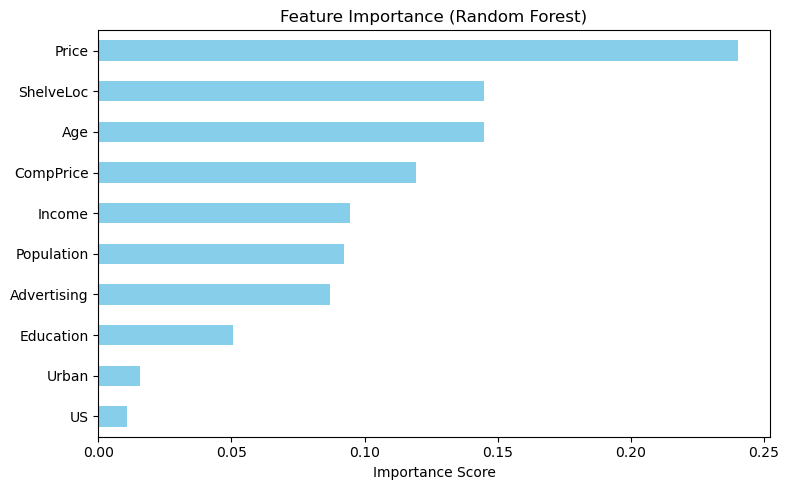

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load dataset
rfc_df = pd.read_csv('D:/TM/Assignment done by me/Mar/29-03-2025/Random Forest Project 9  10/10. Random Forests/Company_Data.csv')
print(rfc_df.head())

# Step 3: Convert categorical variables
rfc_df['Urban'] = rfc_df['Urban'].map({'Yes': 1, 'No': 0})
rfc_df['US'] = rfc_df['US'].map({'Yes': 1, 'No': 0})
rfc_df['ShelveLoc'] = rfc_df['ShelveLoc'].map({'Bad': 0, 'Medium': 1, 'Good': 2})

# Step 4: Create target variable based on Sales
rfc_df['High_Sales'] = rfc_df['Sales'].apply(lambda x: 1 if x > 7 else 0)
rfc_df = rfc_df.drop('Sales', axis=1)

# Step 5: Define features and target
X = rfc_df.drop('High_Sales', axis=1)
y = rfc_df['High_Sales']

# Step 6: Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf_model.predict(X_test)

# Step 9: Evaluation
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("✅ Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Step 11: Feature Importance Plot
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
feature_importance.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
